In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/profit-in-startup-of-a-company/code.py
/kaggle/input/profit-in-startup-of-a-company/50_Startups.csv


In [3]:
df=pd.read_csv("/kaggle/input/profit-in-startup-of-a-company/50_Startups.csv")

In [4]:
df.shape

(50, 5)

In [5]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df=df.drop(columns=['State'])

In [13]:
df_new=df.iloc[:3,0:]

In [14]:
df_new

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


In [15]:
df=df.sample(3)
df=round(df/1000)

In [17]:
df
#Working on small dataset

,R&D Spend,Administration,Marketing Spend,Profit
23,68.0,106.0,305.0,109.0
29,66.0,153.0,107.0,101.0
6,135.0,147.0,128.0,156.0


# Step 1: Initialize f0(x)

In [18]:
df['f0(x)']=df['Profit'].mean()

In [19]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x)
23,68.0,106.0,305.0,109.0,122.0
29,66.0,153.0,107.0,101.0,122.0
6,135.0,147.0,128.0,156.0,122.0


# Step 2 

## Part A

In [21]:
df['ri1']=df['Profit']-df['f0(x)']

In [22]:
df

,R&D Spend,Administration,Marketing Spend,Profit,f0(x),ri1
23,68.0,106.0,305.0,109.0,122.0,-13.0
29,66.0,153.0,107.0,101.0,122.0,-21.0
6,135.0,147.0,128.0,156.0,122.0,34.0


# Part B:Fitting a regression tree

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(max_depth=1)

In [26]:
dt1.fit(df.iloc[:,0:3].values,df['ri1'].values)


DecisionTreeRegressor(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 101.5\nsquared_error = 588.667\nsamples = 3\nvalue = 0.0'),
 Text(0.25, 0.25, 'squared_error = 16.0\nsamples = 2\nvalue = -17.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 34.0')]

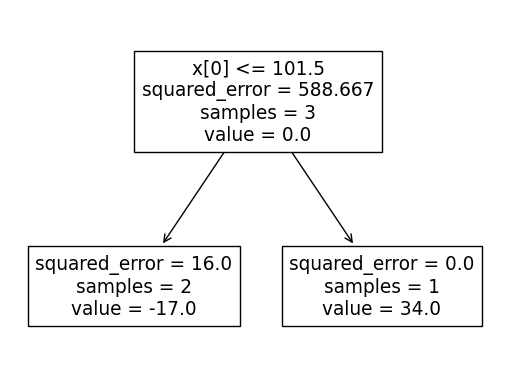

In [27]:
from sklearn.tree import plot_tree
plot_tree(dt1)

# Conclude